In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

%config InlineBackend.figure_format = 'retina'

In [2]:
def iterate_map(f, x_0, n):
    # careful with n = 1; will iterate 0 times
    # maybe it should be range(1, n + 1)?
    trajectory = np.zeros(n)
    trajectory[0] = x_0
    for i in range(1, n):
        trajectory[i] = f(trajectory[i-1])
    
    return trajectory

def get_plot(f, x_start, x_end, x_step=0.01):
    f_vec = np.vectorize(f)
    x = np.arange(x_start, x_end, x_step)
    y = f_vec(x)
    return np.column_stack((x, y))

def get_cobweb(trajectory):
    coords = np.column_stack((np.repeat(trajectory[:-1], 2), 
                              np.repeat(trajectory[1:], 2)))
    coords[::2] = np.column_stack((trajectory[:-1], trajectory[:-1]))
    return coords

In [27]:
logistic_family = lambda a: lambda x: a*x*(1-x)
logistic_map = logistic_family(3.831880000011346)
# logistic_map = logistic_family(3.70177) 7-period
# logistic_map = logistic_family(3.5)


# trajectory = iterate_map(logistic_map, (5 + math.sqrt(5)) / 8, 10)
trajectory = iterate_map(logistic_map, 0.5, 20)
cobweb = get_cobweb(trajectory)
plot = get_plot(logistic_map, 0, 1)

identity_fn = lambda x: x
line = get_plot(identity_fn, 0, 1)

# print(plot)

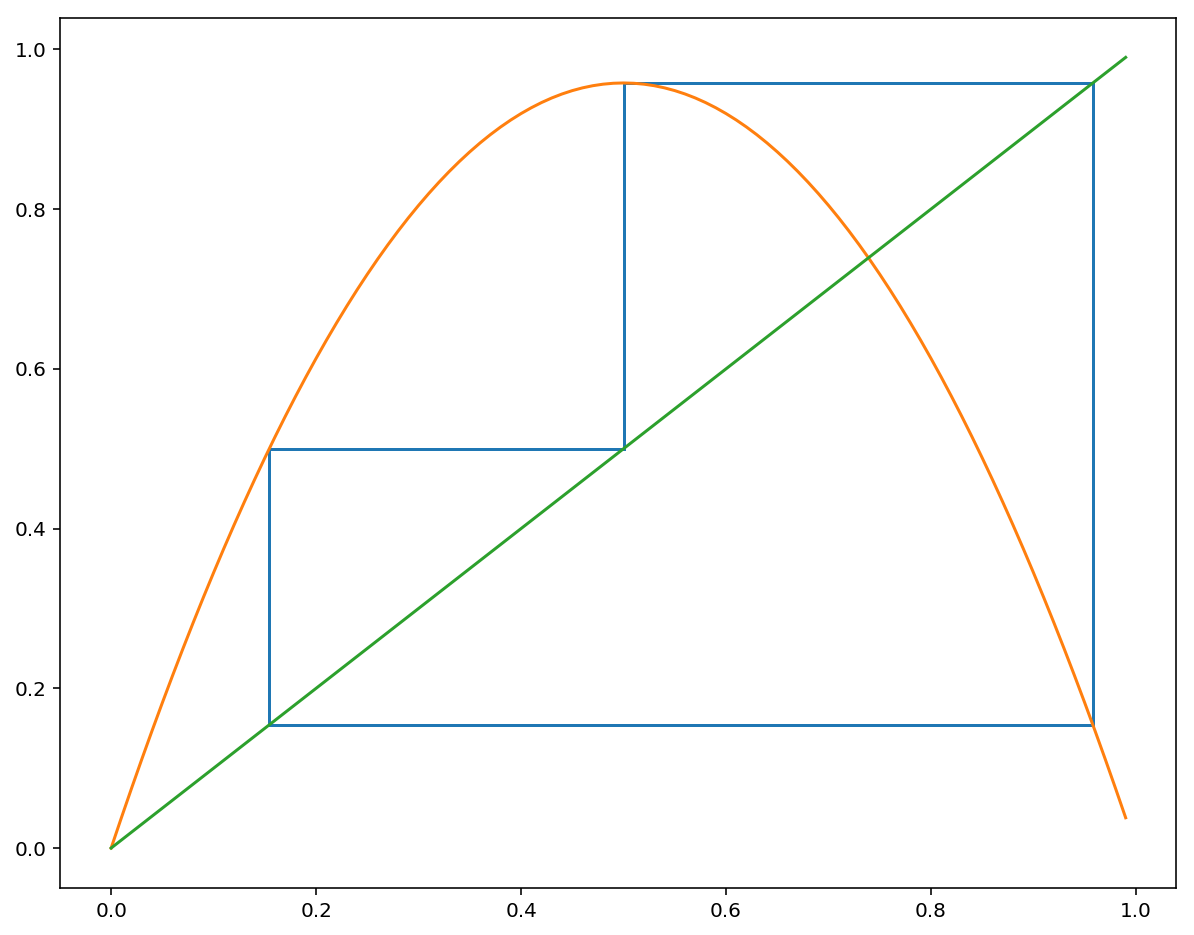

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(cobweb[:,0], cobweb[:,1])
ax.plot(plot[:,0], plot[:,1])
ax.plot(line[:,0], line[:,1])
plt.show()

In [5]:
def find_periodic():
    # find a for 3-periodic of x = 1/2
    a = 2.1
    logistic_map = logistic_family(a)
    trajectory = iterate_map(logistic_map, 0.5, 4)
    epsilon = 0.00001
    while abs(trajectory[0] - trajectory[3]) > epsilon and a < 4:
        logistic_map = logistic_family(a)
        trajectory = iterate_map(logistic_map, 0.5, 4)
        a += 0.00001
    return a

print(find_periodic())

3.831880000011346


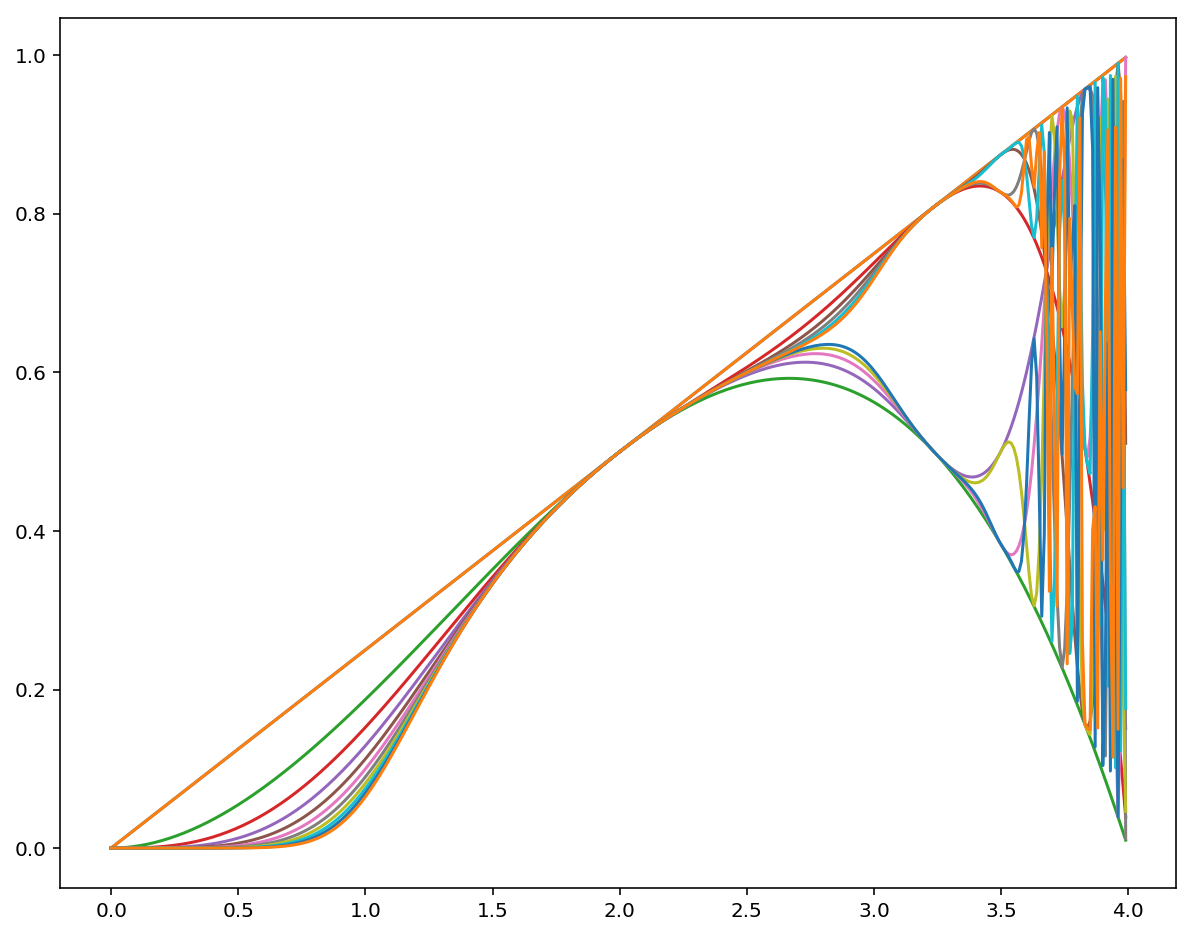

In [6]:
# first Q(n)(a) = nth iterate of x = 1/2, logistic map at a
def Q(n):
    def Q_n(a):
        if n <= 1:
            return a / 4
        else:
            prev = Q(n-1)(a)
            return a * prev * (1 - prev)
    return Q_n

fig, ax = plt.subplots(figsize=(10, 8))
Q_plots = []
for i in range(12):
    Q_plots.append(get_plot(Q(i), 0, 4))
    ax.plot(Q_plots[-1][:,0], Q_plots[-1][:,1])
plt.show()

In [23]:
def find_periodic_powers(n, starting=2.01):
    # find a for 3-periodic of x = 1/2
    
    index = 2**n
    a = starting
    
    logistic_map = logistic_family(a)
    trajectory = iterate_map(logistic_map, 0.5, 2**n + 1)
    epsilon = 0.0001
    orbit = np.argwhere(np.abs(trajectory[1:] - trajectory[0]) < epsilon)
    
    while a < 4:
        if abs(trajectory[0] - trajectory[index]) < epsilon and \
        len(orbit) > 0 and orbit[0] == index - 1:
            print(orbit)
            return a
        logistic_map = logistic_family(a)
        trajectory = iterate_map(logistic_map, 0.5, 2**n + 1)
        orbit = np.argwhere(np.abs(trajectory[1:] - trajectory[0]) < epsilon)
        a += 0.000005
    return a

print(find_periodic_powers(1))
print(find_periodic_powers(2))
print(find_periodic_powers(3))

[[1]]
3.2357849999535944
[[3]]
3.498409999943652
[[7]]
3.5545599999415263


In [21]:
print(find_periodic_powers(4))
print(find_periodic_powers(5))

[[15]]
3.5666299999410693
[[31]]
3.569224999940971


In [24]:
print(find_periodic_powers(6, 3.569224999940971))
print(find_periodic_powers(7, 3.569224999940971))

[[63]]
3.5697899999409497
[[127]]
3.569914999940945


In [26]:
# for wolfram alpha:
# |(x - 2x((x + 1 + sqrt(x^2 -2x -3)) / (2x)))(x - 2x((x + 1 - sqrt(x^2 -2x -3)) / (2x)))| > 1

[]
